In [20]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Fetch dataset (Parkinson's Disease Dataset)
parkinsons = fetch_ucirepo(id=174)

In [3]:
# Inspecting the dataset to check the structure
print(parkinsons.data)  # Verify how the data is structured

{'ids':                name
0    phon_R01_S01_1
1    phon_R01_S01_2
2    phon_R01_S01_3
3    phon_R01_S01_4
4    phon_R01_S01_5
..              ...
190  phon_R01_S50_2
191  phon_R01_S50_3
192  phon_R01_S50_4
193  phon_R01_S50_5
194  phon_R01_S50_6

[195 rows x 1 columns], 'features':      MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  \
0    119.992   157.302    74.997      0.00784      0.00784   0.00370   
1    122.400   148.650   113.819      0.00968      0.00968   0.00465   
2    116.682   131.111   111.555      0.01050      0.01050   0.00544   
3    116.676   137.871   111.366      0.00997      0.00997   0.00502   
4    116.014   141.781   110.655      0.01284      0.01284   0.00655   
..       ...       ...       ...          ...          ...       ...   
190  174.188   230.978    94.261      0.00459      0.00459   0.00263   
191  209.516   253.017    89.488      0.00564      0.00564   0.00331   
192  174.688   240.005    74.287      0.01360      0.01360   0.0062

In [4]:
# Features (X) and target (y)
X = parkinsons.data.features
y = parkinsons.data.targets

In [5]:
# Print the first few rows of X and y to confirm the data
print(X.head())
print(y.head())

   MDVP:Fo  MDVP:Fhi  MDVP:Flo  MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  \
0  119.992   157.302    74.997      0.00784      0.00784   0.00370   0.00554   
1  122.400   148.650   113.819      0.00968      0.00968   0.00465   0.00696   
2  116.682   131.111   111.555      0.01050      0.01050   0.00544   0.00781   
3  116.676   137.871   111.366      0.00997      0.00997   0.00502   0.00698   
4  116.014   141.781   110.655      0.01284      0.01284   0.00655   0.00908   

   Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer  ...  MDVP:APQ  Shimmer:DDA  \
0     0.01109       0.04374       0.04374  ...   0.02971      0.06545   
1     0.01394       0.06134       0.06134  ...   0.04368      0.09403   
2     0.01633       0.05233       0.05233  ...   0.03590      0.08270   
3     0.01505       0.05492       0.05492  ...   0.03772      0.08771   
4     0.01966       0.06425       0.06425  ...   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2       PPE  

In [6]:
# Check for missing values
print(X.isnull().sum())  # Check for missing values in the features
print(y.isnull().sum())  # Check for missing values in the target

MDVP:Fo         0
MDVP:Fhi        0
MDVP:Flo        0
MDVP:Jitter     0
MDVP:Jitter     0
MDVP:RAP        0
MDVP:PPQ        0
Jitter:DDP      0
MDVP:Shimmer    0
MDVP:Shimmer    0
Shimmer:APQ3    0
Shimmer:APQ5    0
MDVP:APQ        0
Shimmer:DDA     0
NHR             0
HNR             0
RPDE            0
DFA             0
spread1         0
spread2         0
D2              0
PPE             0
dtype: int64
status    0
dtype: int64


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Check the shape of the resulting datasets
print(X_train.shape, X_test.shape)

(156, 22) (39, 22)


In [9]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=10000)

In [10]:
# Train the model using the training data
model.fit(X_train, y_train)

c:\Users\riyad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Print the first few predictions
print(y_pred[:10])

[1 1 1 1 1 1 1 1 1 1]


In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8974


In [15]:
# Get a detailed classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

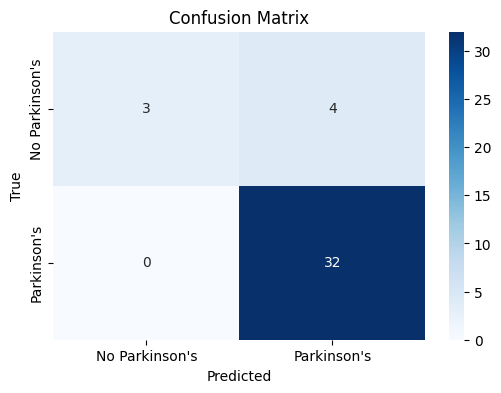

In [21]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Parkinson's", "Parkinson's"], yticklabels=["No Parkinson's", "Parkinson's"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

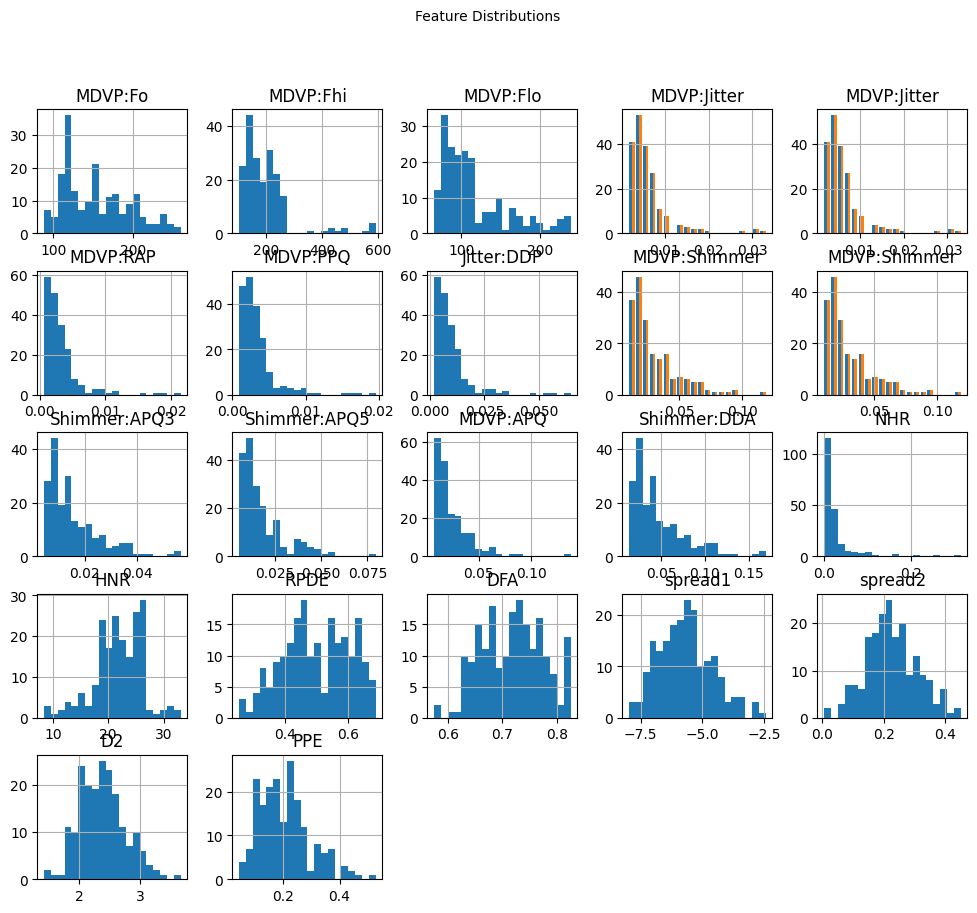

In [25]:
# Plot histograms for each feature in the dataset
X.hist(figsize=(12, 10), bins=20)
plt.suptitle('Feature Distributions', fontsize=10)
plt.show()

In [26]:
# Calculate correlation matrix
corr_matrix = X.corr()

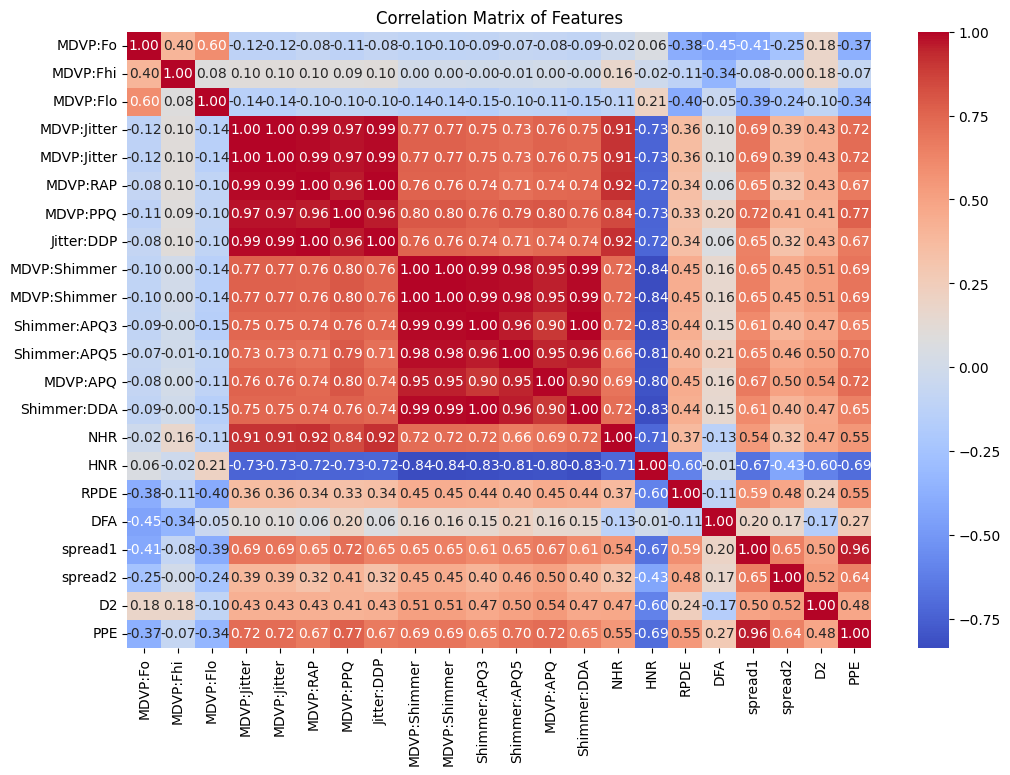

In [27]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

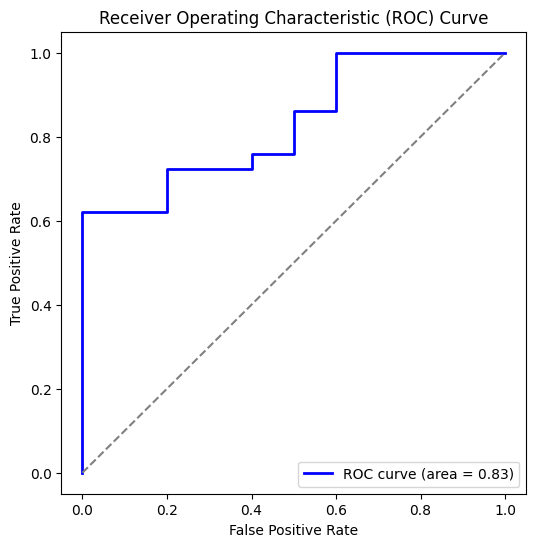

In [42]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (Parkinson's)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

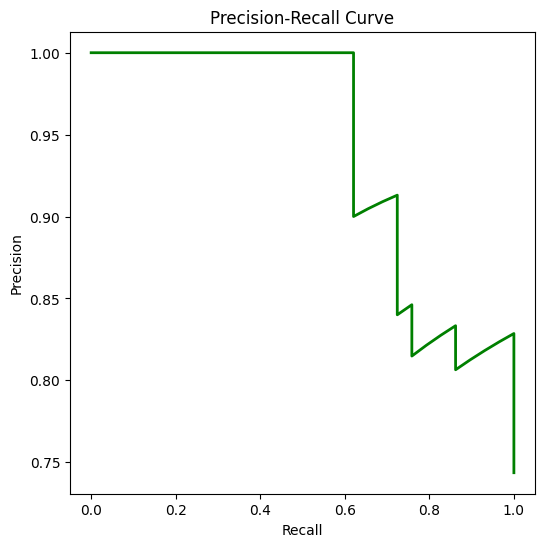

In [41]:
from sklearn.metrics import precision_recall_curve

# Get precision-recall curve data
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='green', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

c:\Users\riyad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\riyad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\riyad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\riyad\AppData\

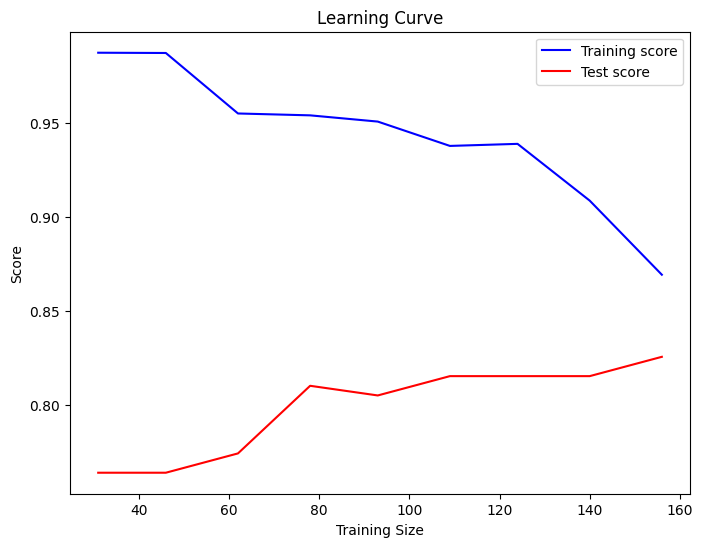

In [43]:
from sklearn.model_selection import learning_curve

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
)

# Plot learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test score', color='red')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()
